In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#
import statsmodels.api as sm

np.random.seed(42)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel('link_to_file')

In [4]:
data.describe()

,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,LAI_JUL,...,LST_AUG,LST_SEP,LST_OCT,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,...,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,2014.500000,0.970943,0.289169,0.358941,0.538719,0.583417,0.484534,0.445450,0.430556,0.536900,...,302.131110,304.388207,307.115692,304.544305,4.282768,13.201563,11.534331,6.531961,0.893648,0.172250
std,2.875408,0.405149,0.063707,0.096858,0.077897,0.079163,0.100227,0.073495,0.190330,0.217338,...,2.552918,1.937737,3.028334,2.101414,2.869681,4.014960,4.150599,3.817987,0.933731,0.267197
min,2010.000000,0.000000,0.108369,0.104135,0.270925,0.361784,0.297160,0.280770,0.191828,0.134593,...,280.155000,298.935300,300.396300,299.498100,0.299988,4.604396,2.782477,0.768566,0.000000,0.000000
25%,2012.000000,0.661290,0.244076,0.297053,0.488871,0.532407,0.400338,0.392869,0.283626,0.377937,...,300.823025,303.003750,304.689425,303.111725,2.388944,10.314473,8.078396,4.263352,0.250863,0.004740
50%,2014.500000,0.935442,0.281703,0.359820,0.546987,0.588356,0.473149,0.435843,0.384773,0.520825,...,301.946300,304.459050,307.363050,304.629900,3.702311,12.782600,10.877090,5.650451,0.580923,0.087503
75%,2017.000000,1.272727,0.326647,0.435370,0.600105,0.637506,0.556832,0.491219,0.538415,0.659231,...,303.325625,305.613400,309.467800,305.967050,5.410815,15.501995,14.559570,7.503354,1.206442,0.237279
max,2019.000000,2.488515,0.516840,0.593550,0.686390,0.790756,0.760128,0.685336,1.283500,1.248005,...,309.247000,309.566300,313.578300,310.091900,17.556680,27.128330,23.176880,24.664330,5.698166,1.964114


In [5]:
var = ['NDVI', 'LAI', 'ET', 'LST', 'RF']

In [6]:
stor_dict = {}
for v in var:
    l = []
    for col in data.columns:
        if v in col:
            l.append(col)
            stor_dict[v] = l   

In [7]:
for key, values in stor_dict.items():
    avg = key + '_avg'
    min_ = key + '_min'
    max_ = key + '_max'
    
    data[avg] = data[values].astype(float).mean(axis=1)
    data[min_] = data[values].astype(float).max(axis=1)
    data[max_] = data[values].astype(float).max(axis=1)
    
    data = data.drop(values, axis = 1)

In [8]:
grouped_data = data.drop('DISTRICTS', axis=1).groupby('YEAR').mean()

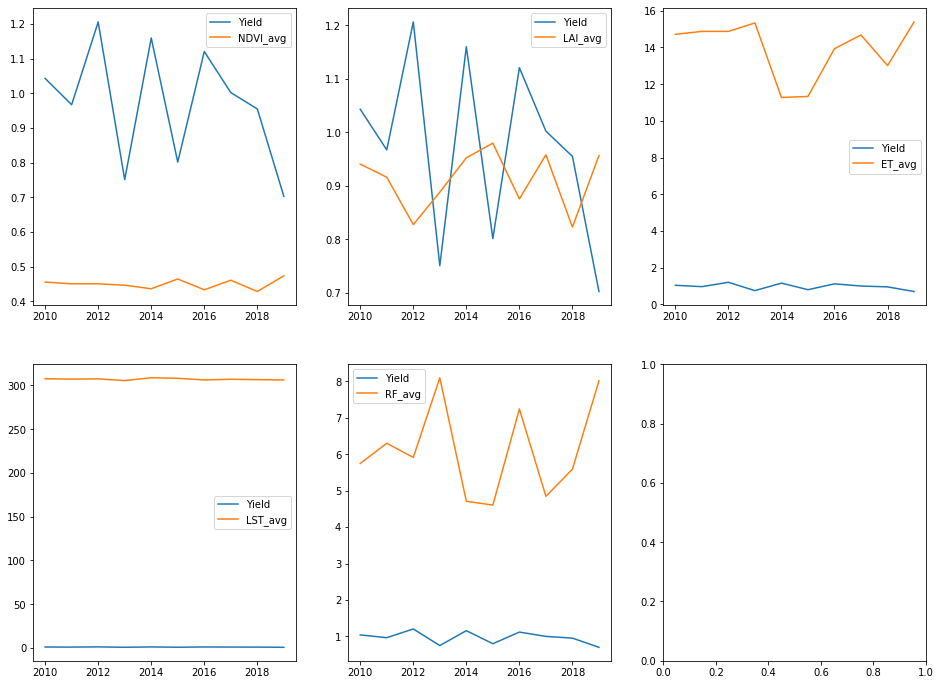

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(16,12))

dict_keys = ['NDVI_avg', 'LAI_avg', 'ET_avg', 'LST_avg', 'RF_avg']

l = 0
for i in range(2):
    for j in range(3):
        
        if l == len(dict_keys):
            break
        
        key = dict_keys[l]
        
        axes[i][j].plot(grouped_data.index, grouped_data.YIELD, label='Yield')
        axes[i][j].plot(grouped_data.index, grouped_data[key], label=key)
        axes[i][j].legend()
        
        l += 1

plt.show()

## Overall Correlation

In [10]:
l = ['YIELD', 'NDVI_avg', 'LAI_avg', 'ET_avg', 'LST_avg', 'RF_avg']

In [11]:
sample = grouped_data[l]

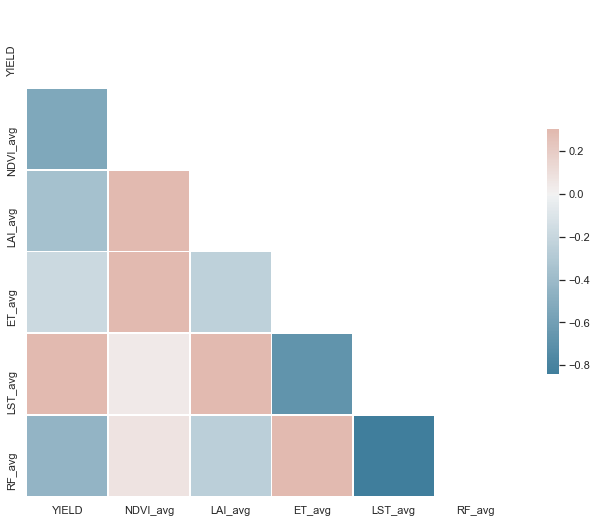

In [12]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = sample.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
corr

,YIELD,NDVI_avg,LAI_avg,ET_avg,LST_avg,RF_avg
YIELD,1.000000,-0.532239,-0.356463,-0.185389,0.480650,-0.442386
NDVI_avg,-0.532239,1.000000,0.650660,0.307692,0.043741,0.073142
LAI_avg,-0.356463,0.650660,1.000000,-0.241982,0.392252,-0.255719
ET_avg,-0.185389,0.307692,-0.241982,1.000000,-0.679882,0.686069
LST_avg,0.480650,0.043741,0.392252,-0.679882,1.000000,-0.840390
RF_avg,-0.442386,0.073142,-0.255719,0.686069,-0.840390,1.000000


## Corrrelation in detail

In [14]:
dfm = data.melt(['DISTRICTS', 'YEAR'], var_name='variables', value_name='vals')

In [15]:
l = ['NDVI_avg', 'LAI_avg', 'ET_avg', 'LST_avg', 'RF_avg']

In [16]:
r = {}
for i in dfm.DISTRICTS.unique():
    for j in l:
        df = dfm[dfm.DISTRICTS == i]
        df = df[(df.variables == 'YIELD') | (df.variables == j)]

        name = i + '_' + j

        r[name] = df.corr()['vals']['YEAR']

In [17]:
marklist = sorted(r.items(), key=lambda x:x[1], reverse=True)
sortdict = dict(marklist)

In [18]:
p = pd.Series(sortdict)

In [19]:
p.head(20)

Katni_LAI_avg          0.513583
Burhanpur_LAI_avg      0.407149
Katni_NDVI_avg         0.344550
Jhabua_LAI_avg         0.344142
Bhind_LAI_avg          0.293226
Barwani_LAI_avg        0.278580
Burhanpur_NDVI_avg     0.267918
Bhind_NDVI_avg         0.258543
Datia_LAI_avg          0.249156
Chhatarpur_LAI_avg     0.220201
Anuppur_LAI_avg        0.210610
Rewa_LAI_avg           0.207023
Chhatarpur_NDVI_avg    0.199324
Barwani_NDVI_avg       0.189443
Anuppur_NDVI_avg       0.179054
Jhabua_NDVI_avg        0.169087
Hoshangabad_LAI_avg    0.149784
Rewa_NDVI_avg          0.143504
Datia_NDVI_avg         0.133937
Umaria_NDVI_avg        0.122408
dtype: float64

## Empirical Formula

In [20]:
col = ['YIELD', 'NDVI_avg', 'LAI_avg', 'ET_avg', 'LST_avg', 'RF_avg']
y_col = 'YIELD'

In [21]:
reg_data = grouped_data[col]

In [22]:
X_col = [i for i in reg_data.columns if i != y_col]
X = reg_data[X_col]
y = reg_data[y_col]

In [23]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  YIELD   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              92.49
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                    6.35e-05
Time:                        23:23:18   Log-Likelihood:                          8.6544
No. Observations:                  10   AIC:                                     -7.309
Df Residuals:                       5   BIC:                                     -5.796
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## ML Model

In [24]:
# no longer treating variables as iid

In [25]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [26]:
ml_data = reg_data.reset_index()
ml_data.YEAR = pd.to_datetime(ml_data['YEAR'], format='%Y')

ml_data = ml_data[['YEAR', 'YIELD', 'NDVI_avg', 'LAI_avg', 'ET_avg', 'LST_avg', 'RF_avg']]
ml_data.columns = ['ds', 'y', 'NDVI_avg', 'LAI_avg', 'ET_avg', 'LST_avg', 'RF_avg']


ml_data['cap'] = 3


In [27]:
m = Prophet(interval_width=0.95)
m.add_regressor('NDVI_avg')
m.add_regressor('LAI_avg')
m.add_regressor('ET_avg')
m.add_regressor('LST_avg')
m.add_regressor('RF_avg')
m.fit(ml_data)

23:23:20 - cmdstanpy - INFO - Chain [1] start processing
23:23:20 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
def random_future_value_ndvi(ds):
    return ml_data['NDVI_avg'].sample().values[0]

def random_future_value_lai(ds):
    return ml_data['LAI_avg'].sample().values[0]

def random_future_value_et(ds):
    return ml_data['ET_avg'].sample().values[0]

def random_future_value_lst(ds):
    return ml_data['LST_avg'].sample().values[0]

def random_future_value_RF(ds):
    return ml_data['RF_avg'].sample().values[0]

In [29]:
future = m.make_future_dataframe(periods=2)
future['cap'] = 3
future['NDVI_avg'] = future['ds'].apply(random_future_value_ndvi)
future['LAI_avg'] = future['ds'].apply(random_future_value_lai)
future['ET_avg'] = future['ds'].apply(random_future_value_et)
future['LST_avg'] = future['ds'].apply(random_future_value_lst)
future['RF_avg'] = future['ds'].apply(random_future_value_RF)

future.tail()

,ds,cap,NDVI_avg,LAI_avg,ET_avg,LST_avg,RF_avg
7,2017-01-01,3,0.436298,0.940641,13.013513,307.522956,8.008827
8,2018-01-01,3,0.450560,0.916173,14.679567,306.484748,8.092943
9,2019-01-01,3,0.436298,0.958096,11.275270,306.149908,4.842276
10,2019-01-02,3,0.464459,0.979787,11.275270,308.002749,5.907882
11,2019-01-03,3,0.450560,0.875729,15.390176,307.048995,5.744706


In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2017-01-01,1.042407,0.978520,1.110029
8,2018-01-01,0.877401,0.808691,0.942958
9,2019-01-01,0.834273,0.767699,0.902290
10,2019-01-02,0.864210,0.798041,0.933063
11,2019-01-03,2.142510,2.077478,2.206534


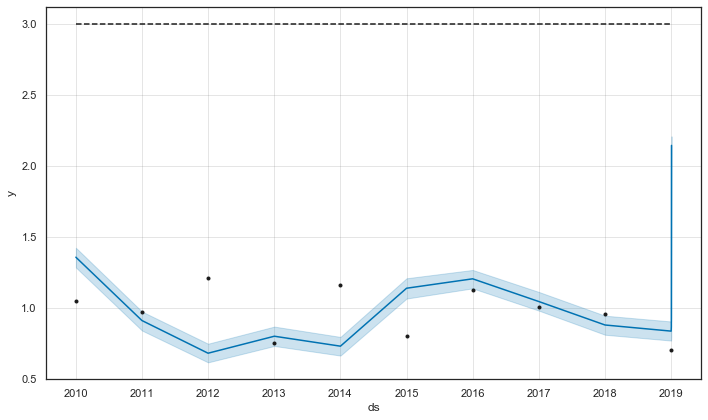

In [31]:
fig1 = m.plot(forecast)

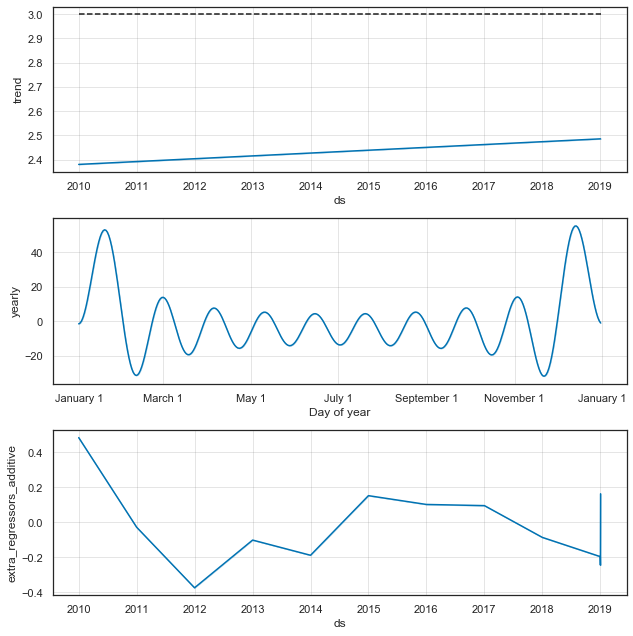

In [32]:
fig2 = m.plot_components(forecast)